# Employee Attrition Analysis
Author : Jordan Liew

Dataset: IBM HR Employee Attrition Dataset

## 1. Introduction (Markdown cell)

### What is employee attrition?

Employee attrition refers to the phenomenon where employees leave an organization due to resignation, retirement, or termination and are not immediately replaced. 

High attrition can lead to increased recruitment costs, loss of organizational knowledge, reduced productivity, and lower employee morale.

Understanding the factors that influence employee attrition allows organizations to:

1. Improve employee retention

2. Increase job satisfaction

3. Reduce operational and hiring costs

This project analyses the IBM HR Analytics Employee Attrition dataset to identify key factors associated with employee turnover using exploratory data analysis (EDA) and data visualisation.

### Main Question

**What are the key factors associated with employee attrition (turnover) in the IBM HR dataset?**

### Key Questions Explored

1. What percentage of employees leave the company?

2. Which demographic factors (age, gender, marital status) are associated with higher attrition?

3. How do job-related factors (department, job level, income, overtime) impact attrition?

4. What role do satisfaction and work-life balance play in employee turnover?

5. Which factors show the strongest relationship with attrition?

## Data Overview (Markdown + Code)

The dataset contains employee-level HR data including demographics, job characteristics, compensation, satisfaction scores, and attrition status.

Target variable:

- Attrition (Yes / No)

### Data Loading & Inspection


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Read the dataset
df = pd.read_csv('employee_attrition_ibm_hr.csv')

# Display the first 5 rows and show number of columns
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


###  Dataset Structure

Before analysis, we examine the structure of the dataset and check for missing values.

In [3]:
# Check column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
# Get summary statistics for numerical columns
df.describe().round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


The dataset contains 1,470 employees and 35 variables.

There are no missing values.

Variables include both numeric and categorical features.

## Exploratory Data Analysis (EDA)

Purpose:
EDA helps identify patterns, trends, and relationships in the data before modeling.

### Employee Attrition Distribution

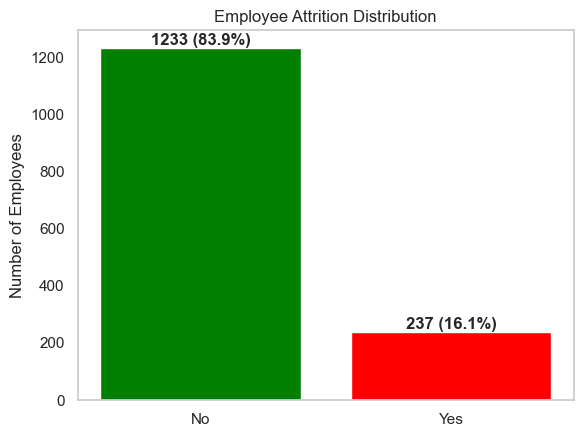

In [17]:
attrition_counts = df['Attrition'].value_counts()
total = len(df)

# Create bar plot with colors
plt.bar(attrition_counts.index, attrition_counts.values, color=['green', 'red'])
plt.title('Employee Attrition Distribution')
plt.ylabel('Number of Employees')
plt.grid(False)

# Add percentage labels
for i, (label, count) in enumerate(zip(attrition_counts.index, attrition_counts.values)):
    percentage = f'{100 * count / total:.1f}%'
    plt.text(i, count + 10, f'{count} ({percentage})', ha='center', fontsize=12, fontweight='bold')

plt.show()

Out of 1,470 employees, most remain with the company.

About 16% (237 employees) have left, which represents a meaningful retention issue. The next step is to understand who is leaving and why.

This class imbalance is typical in HR datasets and must be considered during analysis.

# Encode Attrition


In [18]:
df_encoded = df.copy()
df_encoded['Attrition'] = df_encoded['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate overall attrition rate
df_encoded['Attrition'].mean()


0.16122448979591836

## Attrition by Key Dimensions

Attrition by Department


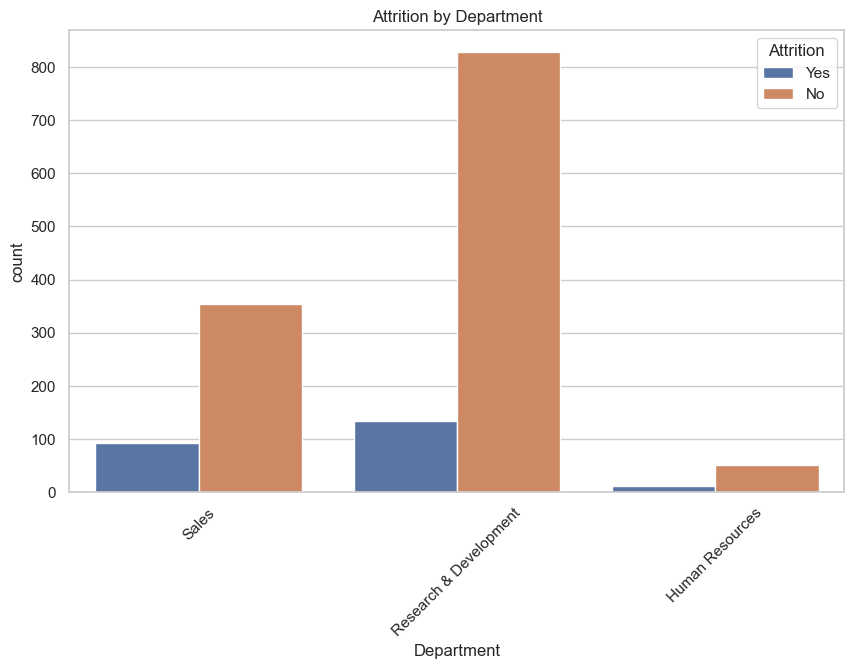

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

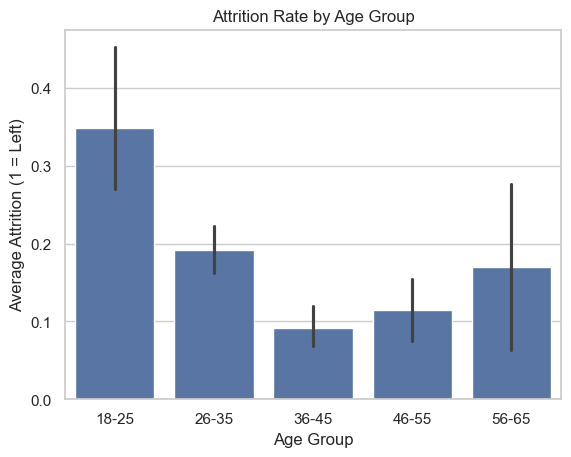

In [12]:
# Create age groups
df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], bins=[18,25,35,45,55,65], 
                                labels=['18-25','26-35','36-45','46-55','56-65'])

# Bar plot
sns.barplot(x='AgeGroup', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Attrition (1 = Left)')
plt.show()


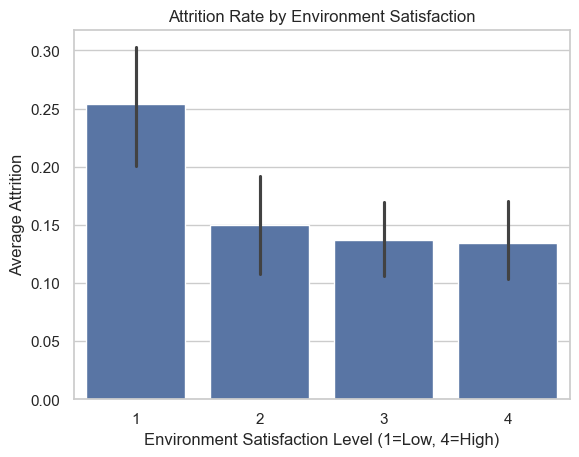

In [13]:
sns.barplot(x='EnvironmentSatisfaction', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Environment Satisfaction')
plt.xlabel('Environment Satisfaction Level (1=Low, 4=High)')
plt.ylabel('Average Attrition')
plt.show()


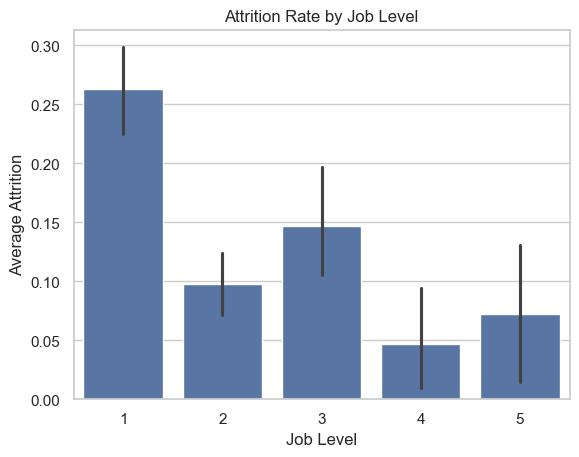

In [14]:
sns.barplot(x='JobLevel', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Average Attrition')
plt.show()


### Attrition by Gender

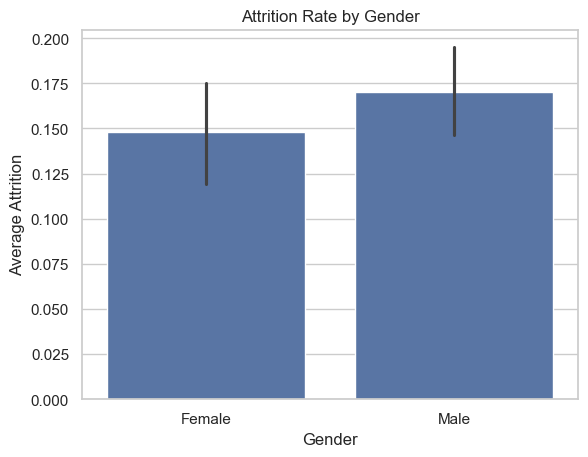

In [20]:
sns.barplot(x='Gender', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Attrition')
plt.show()


### Attrition by Marital Status

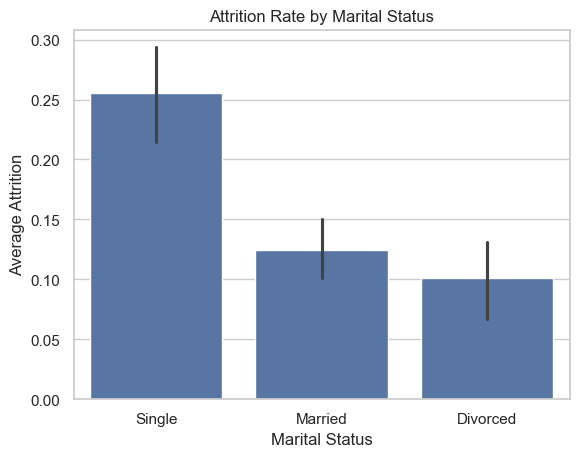

In [21]:
sns.barplot(x='MaritalStatus', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Attrition')
plt.show()


### Attrition by Overtime

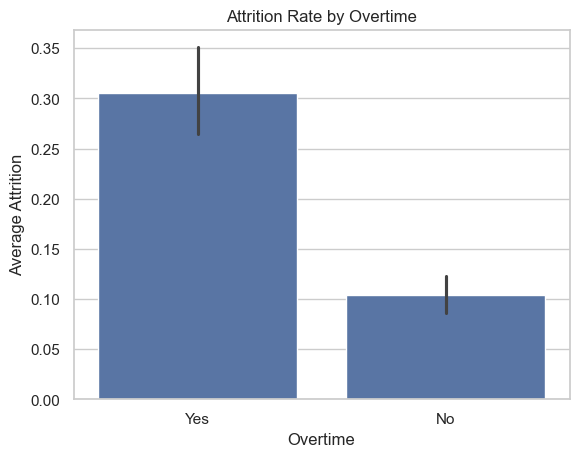

In [22]:
sns.barplot(x='OverTime', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Average Attrition')
plt.show()


### Attrition by Monthly Income Groups

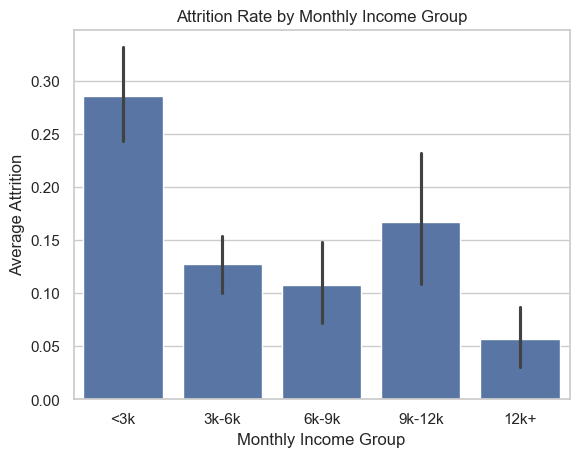

In [24]:
# Create income groups
df_encoded['IncomeGroup'] = pd.cut(df_encoded['MonthlyIncome'], bins=[0, 3000, 6000, 9000, 12000, 20000], 
                                   labels=['<3k', '3k-6k', '6k-9k', '9k-12k', '12k+'])

sns.barplot(x='IncomeGroup', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Monthly Income Group')
plt.xlabel('Monthly Income Group')
plt.ylabel('Average Attrition')
plt.show()


### Attrition by Job Satisfaction

In [ ]:
sns.barplot(x='JobSatisfaction', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Job Satisfaction')
plt.xlabel('Job Satisfaction Level (1=Low, 4=High)')
plt.ylabel('Average Attrition')
plt.show()


### Attrition by Work-Life Balance

In [ ]:
sns.barplot(x='WorkLifeBalance', y='Attrition', data=df_encoded)
plt.title('Attrition Rate by Work-Life Balance')
plt.xlabel('Work-Life Balance Level (1=Bad, 4=Best)')
plt.ylabel('Average Attrition')
plt.show()


 ###    Identify numeric columns that might be categorical

In [16]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Print number of unique values per numeric column
for col in numeric_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

# Identify likely categorical numeric columns (few unique values)
categorical_numeric = [col for col in numeric_cols if df[col].nunique() < 10]
print("\nLikely categorical numeric columns:", categorical_numeric)

Age: 43 unique values
DailyRate: 886 unique values
DistanceFromHome: 29 unique values
Education: 5 unique values
EmployeeCount: 1 unique values
EmployeeNumber: 1470 unique values
EnvironmentSatisfaction: 4 unique values
HourlyRate: 71 unique values
JobInvolvement: 4 unique values
JobLevel: 5 unique values
JobSatisfaction: 4 unique values
MonthlyIncome: 1349 unique values
MonthlyRate: 1427 unique values
NumCompaniesWorked: 10 unique values
PercentSalaryHike: 15 unique values
PerformanceRating: 2 unique values
RelationshipSatisfaction: 4 unique values
StandardHours: 1 unique values
StockOptionLevel: 4 unique values
TotalWorkingYears: 40 unique values
TrainingTimesLastYear: 7 unique values
WorkLifeBalance: 4 unique values
YearsAtCompany: 37 unique values
YearsInCurrentRole: 19 unique values
YearsSinceLastPromotion: 16 unique values
YearsWithCurrManager: 18 unique values

Likely categorical numeric columns: ['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLev

 ###    Map categorical numeric columns

In [17]:
# Define mappings
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
worklife_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
performance_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}

# Apply mappings
df['Education'] = df['Education'].map(education_map)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(satisfaction_map)
df['JobInvolvement'] = df['JobInvolvement'].map(satisfaction_map)
df['JobSatisfaction'] = df['JobSatisfaction'].map(satisfaction_map)
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(worklife_map)
df['PerformanceRating'] = df['PerformanceRating'].map(performance_map)

# Verify mappings
df[['Education', 'JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating']].head()


,Education,JobSatisfaction,WorkLifeBalance,PerformanceRating
0,College,Very High,Bad,Excellent
1,Below College,Medium,Better,Outstanding
2,College,High,Better,Excellent
3,Master,High,Better,Excellent
4,Below College,Medium,Better,Excellent


###     Export cleaned data to Tableau

In [14]:
df.to_csv('employee_attrition_cleaned.csv', index=False)


## Key Insights and Summary

### Main Findings
- **Overall Attrition Rate**: 16% (237 out of 1,470 employees) left, indicating a retention challenge.
- **Demographic Factors**: Higher attrition among younger employees (18-35), males, and singles.
- **Job-Related Factors**: Employees in sales/research, with overtime, lower job levels, or lower income (<$9k) leave more.
- **Satisfaction & Environment**: Lower job satisfaction, work-life balance, and environment satisfaction correlate with higher turnover.
- **Strongest Correlations** (from heatmap): Negative with age (-0.16), job level (-0.17), income (-0.16), and tenure (-0.16); positive with overtime.

### HR Implications
- Focus retention on high-risk groups: Pay attention to keeping employees who are single with overtime, low satisfaction, or in sales.
- Interventions: Improve work-life balance, reduce overtime, enhance satisfaction surveys (asking employees what they like/dislike about work)

### Limitations
- Dataset is fictional and cross-sectional (no time-based trajectories).
- Correlation ≠ causation; findings are associations, not proven causes.
- Class imbalance (84% stay) may bias models; use balanced metrics if predicting.

### Next Steps
- Build predictive models (e.g., logistic regression) with feature selection and cross-validation.
- Collect information over time to understand turnover patterns.
- Validate with real HR surveys to ensure our ideas are right.